In [1]:
import os
os.chdir('../../')

In [2]:
import pandas as pd
import numpy as np
from numpy.random import randn
from math import radians, sin, cos, sqrt, asin
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [3]:
from data_pipeline import Pipeline

In [4]:
df = pd.read_csv('data/CreditCardFraudFourYears.csv')

In [5]:
pipeline = Pipeline()
transformed_df = pipeline.transform(df)

In [9]:
split_date = int(len(transformed_df) * 0.8)

split_date = transformed_df.index[split_date]
print(str(split_date))

2021-12-31 00:00:00


In [12]:
from sklearn.preprocessing import MinMaxScaler

train = transformed_df.loc[transformed_df.index <= split_date]
test = transformed_df.loc[transformed_df.index > split_date]

target = 'total_daily_fraud_transactions'
features = [col for col in transformed_df.columns if col != target]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

X_train_reshaped = X_train_reshaped.astype('float32')
X_test_reshaped = X_test_reshaped.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [34]:
history = model.fit(X_train_reshaped, y_train, epochs=500, batch_size=6, validation_data=(X_test_reshaped, y_test), verbose=1)

Epoch 1/500
244/244 [==============================] - 1s 3ms/step - loss: 30.8915 - val_loss: 35.7997
Epoch 2/500
244/244 [==============================] - 1s 3ms/step - loss: 30.7739 - val_loss: 32.6386
Epoch 3/500
244/244 [==============================] - 1s 3ms/step - loss: 30.7535 - val_loss: 34.7836
Epoch 4/500
244/244 [==============================] - 1s 3ms/step - loss: 31.6257 - val_loss: 32.3766
Epoch 5/500
244/244 [==============================] - 1s 3ms/step - loss: 30.8995 - val_loss: 32.7392
Epoch 6/500
244/244 [==============================] - 1s 3ms/step - loss: 30.8856 - val_loss: 32.9726
Epoch 7/500
244/244 [==============================] - 1s 3ms/step - loss: 30.9692 - val_loss: 33.5711
Epoch 8/500
244/244 [==============================] - 1s 3ms/step - loss: 31.5047 - val_loss: 33.6285
Epoch 9/500
244/244 [==============================] - 1s 3ms/step - loss: 31.0369 - val_loss: 32.3991
Epoch 10/500
244/244 [==============================] - 1s 3ms/step - los

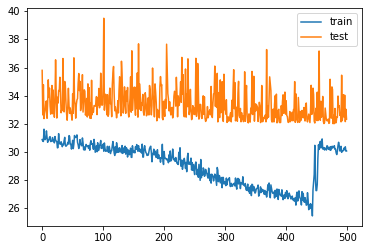

12/12 [==============================] - 0s 2ms/step


In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

predicted_transactions = model.predict(X_test_reshaped)

predicted_transactions = predicted_transactions.flatten()

                 Date  Actual_Transactions  Predicted_Transactions
trans_date                                                        
2022-01-01 2022-01-01                  2.0                5.930282
2022-01-02 2022-01-02                  0.0                4.735326
2022-01-03 2022-01-03                  0.0                5.094604
2022-01-04 2022-01-04                  7.0                5.340211
2022-01-05 2022-01-05                  2.0                5.281828
...               ...                  ...                     ...
2022-12-27 2022-12-27                  0.0                4.379738
2022-12-28 2022-12-28                  0.0                4.815311
2022-12-29 2022-12-29                  0.0                7.164790
2022-12-30 2022-12-30                  0.0                5.594151
2022-12-31 2022-12-31                  0.0                5.406168

[365 rows x 3 columns]


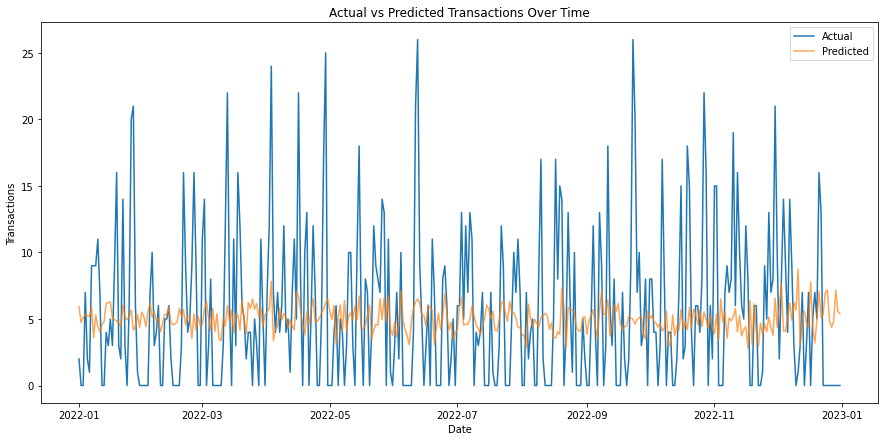

In [36]:
predicted_transactions = predicted_transactions.flatten()

assert len(predicted_transactions) == len(y_test)

results_df = pd.DataFrame({
    'Date': test.index,  
    'Actual_Transactions': y_test,
    'Predicted_Transactions': predicted_transactions
})

results_df['Date'] = pd.to_datetime(results_df['Date'])

print(results_df)

plt.figure(figsize=(15, 7))
plt.plot(results_df['Date'].values, results_df['Actual_Transactions'].values, label='Actual')
plt.plot(results_df['Date'].values, results_df['Predicted_Transactions'].values, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.legend()
plt.show()
